In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import pandas as pd
import seaborn as sns


### 1) Primer punto

In [3]:
def distanciaEuclidaneaCuadrada(punto1, punto2):
    return np.sum((punto1 - punto2) ** 2)

centroides_camino1 = []
centroides_camino2 = []

def KMeans2(D, k, epsilon):

    muestra, caracteristicas = np.shape(D)

    centroides = D[np.random.choice(muestra, k, replace=False)]
    t = 0
    centroides_camino1 = []
    centroides_camino2 = []
    while True:
        t += 1
        print(f'Iteración {t}')
        clusters = np.zeros(muestra)
        for i, punto in enumerate(D):
            clusters[i] = np.argmin([distanciaEuclidaneaCuadrada(punto, centroide) for centroide in centroides])
        centroides_nuevos = np.zeros((k, caracteristicas))

        for i in range(k):
            centroides_nuevos[i] = np.mean(D[clusters == i], axis=0)
        
        centroides_camino1.append(centroides_nuevos[0])
        centroides_camino2.append(centroides_nuevos[1])
                    
        if np.all(np.abs(centroides - centroides_nuevos) < epsilon):
            
            break

        centroides = centroides_nuevos

    return centroides, clusters, centroides_camino1, centroides_camino2


Iteración 1
Iteración 2


<function matplotlib.pyplot.show(close=None, block=None)>

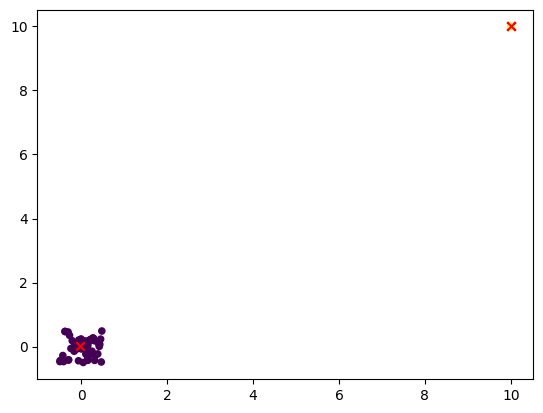

In [4]:
def dataset():
    A = np.random.uniform(low=-0.5, high=0.5, size=(50, 2))
    B = np.array([[10,10]])


    return np.concatenate((A, B))

centroides, clusters, camino1, camino2 = KMeans2(dataset(), k=2, epsilon=0.1)
camino1 = np.array(camino1)
camino2 = np.array(camino2)
cluster1_x, cluster1_y = camino1[:, 0], camino1[:, 1]
cluster2_x, cluster2_y = camino2[:, 0], camino2[:, 1]
plt.scatter(cluster1_x, cluster1_y, color='blue', label='Cluster 1', marker='x')
plt.scatter(cluster2_x, cluster2_y, color='red', label='Cluster 2', marker='x')
plt.scatter(dataset()[:, 0], dataset()[:, 1], c=clusters, s=20)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='x')
plt.show

### Prueba César



In [34]:
def kMeans(A, k, eps, mu):
    print(A)
    muestra, caracteristicas = np.shape(A)
    centroides = A[np.random.choice(A.flatten(), size=k, replace=False)]
    while True:
        
        clusters = np.zeros(muestra)
        for i, punto in enumerate(A):
            clusters[i] = np.argmin([distanciaEuclidaneaCuadrada(punto, centroide) for centroide in centroides])
            print(clusters[i])
            
        centroides_nuevos = np.zeros((k, caracteristicas))
        for i in range(k):
            centroides_nuevos[i]    = np.mean(A[clusters == i], axis=0)

        if np.all(np.abs(centroides - centroides_nuevos) < eps):
            break

        centroides = centroides_nuevos

    print(centroides)
    np.argmin


k = 3
mu = [2.2, 1.5]
mu = None
eps = 0.1
KMeans2(A, k, eps)

NameError: name 'A' is not defined

### 2) Segundo Punto

### DBSCAN 

In [37]:
import numpy as np
from scipy.spatial import distance


def DBSCAN(D, epsilon, minpts):
    
    def find_distance(x):
        return distance.squareform(distance.pdist(x))

    def find_neighbors(x, epsilon):
        return np.where(x <= epsilon)[0]

    def expand_cluster(neighbors, cluster, labels, minpts):
        for neighbor in neighbors:
            if labels[neighbor] == -1:
                labels[neighbor] = cluster
                neighbor_neighbors = find_neighbors(dist_matrix[neighbor], epsilon)
                if len(neighbor_neighbors) >= minpts:
                    labels = expand_cluster(neighbor_neighbors, cluster, labels, minpts)
        return labels

    dist_matrix = find_distance(D)
    cluster = -1
    n_obs = D.shape[0]
    labels = np.full(n_obs, -1)
    for i in range(n_obs):
        if labels[i] == -1:
            neighbors = find_neighbors(dist_matrix[i], epsilon)
            if len(neighbors) > minpts:
                cluster += 1
                labels[i] = cluster
                labels = expand_cluster(neighbors, cluster, labels, minpts)
            else:
                labels[i] = -1  
    return labels

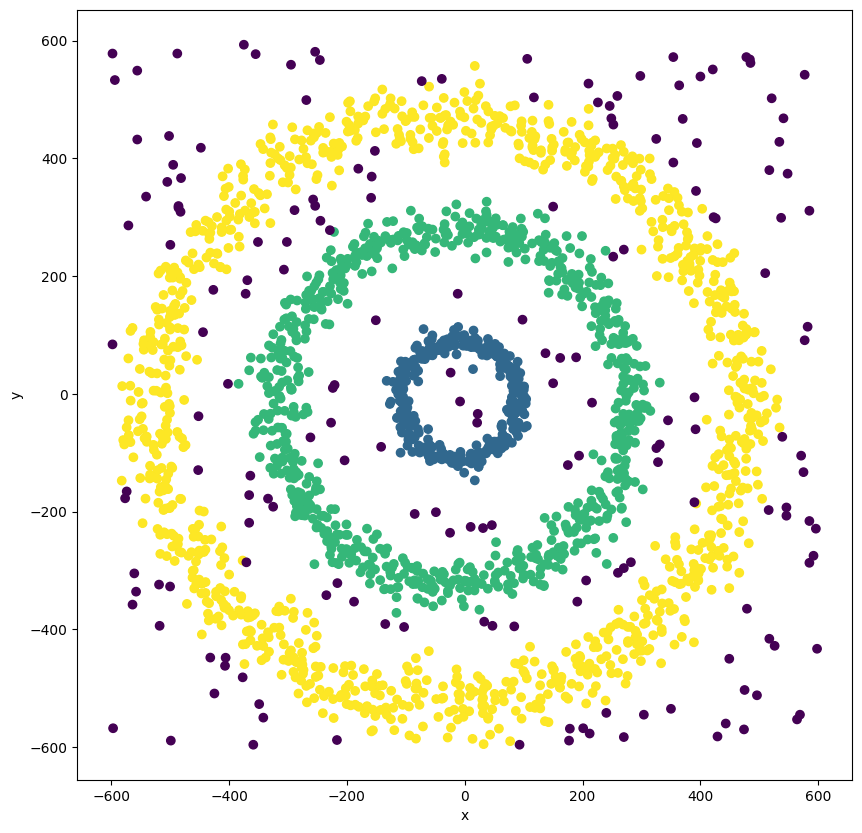

In [38]:
def make_circle(r, n, noise=30, seed=1234):
    np.random.seed(seed)
    return [(np.cos(2 * np.pi / n * x) * r + np.random.normal(-noise, noise), 
             np.sin(2 * np.pi / n * x) * r + np.random.normal(-noise, noise)) for x in range(1, n + 1)]

small_circle = make_circle(100, 300, 10)
medium_circle = make_circle(300, 700, 20)
big_circle = make_circle(500, 1000, 30)

noise = [(np.random.randint(-600, 600), np.random.randint(-600, 600)) for i in range(300)]

def array_to_df(arr, i):
    df = pd.DataFrame(arr)
    df['cluster'] = str(i)
    return df

D = [array_to_df(arr, i) for i, arr in enumerate([small_circle, medium_circle, big_circle, noise])]
D = pd.concat(D)
D.columns = ['x', 'y', 'cluster']

plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot(data=D, x='x', y='y', hue='cluster', legend=False)

D['dbscan_custom'] = DBSCAN(D[['x', 'y']].values, epsilon=32, minpts=5)

plt.scatter(D['x'], D['y'], c=D['dbscan_custom'], cmap='viridis')
plt.show()
